<a href="https://colab.research.google.com/github/Satya-1729/Python-/blob/main/SNN_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

# Parameters
batch_size = 64
time_steps = 30
learning_rate = 1e-3
epochs = 5

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_data = MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# LIF Neuron Model with Surrogate Gradient
class LIFNeuron(nn.Module):
    def __init__(self, threshold=1.0, decay=0.9):
        super(LIFNeuron, self).__init__()
        self.threshold = threshold
        self.decay = decay

    def forward(self, x, membrane_potential=None):
        if membrane_potential is None:
            membrane_potential = torch.zeros_like(x, device=x.device)

        membrane_potential = membrane_potential * self.decay + x
        spikes = (membrane_potential >= self.threshold).float()

        # Use surrogate gradient for spikes
        grad_spikes = torch.sigmoid(membrane_potential - self.threshold) * 0.3  # Surrogate gradient
        spikes = spikes.detach() + grad_spikes  # Apply surrogate gradient

        # Reset potential where spikes occurred
        membrane_potential = membrane_potential * (1 - spikes)

        return spikes, membrane_potential

# Spiking Neural Network Model
class SNN(nn.Module):
    def __init__(self):
        super(SNN, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 10)
        self.lif1 = LIFNeuron()
        self.lif2 = LIFNeuron()

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten input images to [batch_size, 784]
        x = (x + 1) / 2  # Normalize input to [0, 1] for Bernoulli sampling

        spikes = torch.zeros(x.size(0), 10, device=x.device)
        mem_pot1, mem_pot2 = None, None

        for t in range(time_steps):
            x_encoded = torch.bernoulli(x).float()  # Frequency encoding

            h1 = self.fc1(x_encoded)
            h1_spikes, mem_pot1 = self.lif1(h1, mem_pot1)

            h2 = self.fc2(h1_spikes)
            h2_spikes, mem_pot2 = self.lif2(h2, mem_pot2)

            spikes += h2_spikes  # Accumulate spikes over time

        return spikes / time_steps

# Training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# Training loop
for epoch in range(epochs):
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        output = model(images)

        # Compute loss
        loss = criterion(output, labels)
        total_loss += loss.item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss / len(train_loader)}")

print("Training completed.")



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 105MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 15.2MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 78.9MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.49MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch 1/5, Loss: 1.4274790419190169
Epoch 2/5, Loss: 1.324337987121997
Epoch 3/5, Loss: 1.3043772230016144
Epoch 4/5, Loss: 1.2927685118179078
Epoch 5/5, Loss: 1.2843410935737432
Training completed.


Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 49.1MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.60MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 13.3MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 8.56MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch 1/5, Loss: 1.4251396456506968, Accuracy: 88.625%
Epoch 2/5, Loss: 1.3232599885733143, Accuracy: 93.42833333333333%
Epoch 3/5, Loss: 1.3038870689711337, Accuracy: 94.895%
Epoch 4/5, Loss: 1.2923467083017963, Accuracy: 95.79%
Epoch 5/5, Loss: 1.2841191734078088, Accuracy: 96.51666666666667%
Test Accuracy: 96.74%


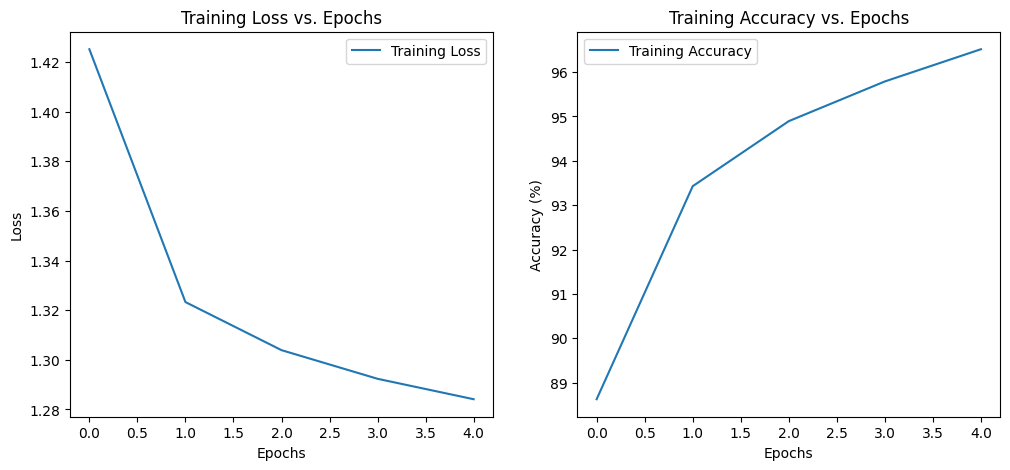

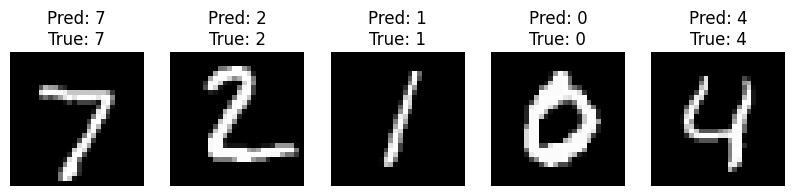

   Digit  Accuracy (%)
0      0     99.081633
1      1     98.854626
2      2     95.348837
3      3     96.039604
4      4     96.028513
5      5     95.852018
6      6     97.703549
7      7     96.498054
8      8     95.893224
9      9     95.143707


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import pandas as pd

# Parameters
batch_size = 64
time_steps = 30
learning_rate = 1e-3
epochs = 5

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_data = MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

test_data = MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# LIF Neuron Model with Surrogate Gradient
class LIFNeuron(nn.Module):
    def __init__(self, threshold=1.0, decay=0.9):
        super(LIFNeuron, self).__init__()
        self.threshold = threshold
        self.decay = decay

    def forward(self, x, membrane_potential=None):
        if membrane_potential is None:
            membrane_potential = torch.zeros_like(x, device=x.device)

        membrane_potential = membrane_potential * self.decay + x
        spikes = (membrane_potential >= self.threshold).float()
        grad_spikes = torch.sigmoid(membrane_potential - self.threshold) * 0.3
        spikes = spikes.detach() + grad_spikes
        membrane_potential = membrane_potential * (1 - spikes)
        return spikes, membrane_potential

# Spiking Neural Network Model
class SNN(nn.Module):
    def __init__(self):
        super(SNN, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 10)
        self.lif1 = LIFNeuron()
        self.lif2 = LIFNeuron()

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = (x + 1) / 2
        spikes = torch.zeros(x.size(0), 10, device=x.device)
        mem_pot1, mem_pot2 = None, None

        for t in range(time_steps):
            x_encoded = torch.bernoulli(x).float()
            h1 = self.fc1(x_encoded)
            h1_spikes, mem_pot1 = self.lif1(h1, mem_pot1)
            h2 = self.fc2(h1_spikes)
            h2_spikes, mem_pot2 = self.lif2(h2, mem_pot2)
            spikes += h2_spikes
        return spikes / time_steps

# Training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# Training loop with loss and accuracy tracking
train_losses = []
train_accuracies = []

for epoch in range(epochs):
    total_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        output = model(images)

        # Compute loss
        loss = criterion(output, labels)
        total_loss += loss.item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accuracy
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    avg_loss = total_loss / len(train_loader)
    accuracy = 100 * correct / total
    train_losses.append(avg_loss)
    train_accuracies.append(accuracy)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss}, Accuracy: {accuracy}%")

# Evaluation function
def evaluate(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            output = model(images)
            _, predicted = torch.max(output.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Evaluate the model
accuracy = evaluate(model, test_loader)
print(f"Test Accuracy: {accuracy:.2f}%")

# Plotting Loss vs. Epochs and Accuracy vs. Epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs. Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training Accuracy vs. Epochs")
plt.legend()
plt.show()

# Visualize some predictions
def visualize_predictions(model, test_loader, num_images=5):
    model.eval()
    images, labels = next(iter(test_loader))
    images = images.to(device)
    labels = labels.to(device)

    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)

    # Set up the figure
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].cpu().squeeze(), cmap='gray')
        plt.title(f'Pred: {predicted[i].item()}\nTrue: {labels[i].item()}')
        plt.axis('off')
    plt.show()

# Displaying sample predictions and a table of accuracies for a few samples
visualize_predictions(model, test_loader, num_images=5)

# Table of accuracies across specific digits in the test set
sample_digits = {i: 0 for i in range(10)}
correct_predictions = {i: 0 for i in range(10)}
model.eval()

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        for i in range(len(labels)):
            label = labels[i].item()
            sample_digits[label] += 1
            if predicted[i] == label:
                correct_predictions[label] += 1

# Prepare and display the table
accuracy_per_digit = {digit: 100 * correct_predictions[digit] / sample_digits[digit]
                      if sample_digits[digit] != 0 else 0
                      for digit in range(10)}

accuracy_table = pd.DataFrame(list(accuracy_per_digit.items()), columns=["Digit", "Accuracy (%)"])
print(accuracy_table)


Epoch 1/5, Loss: 1.4266411777752548
Epoch 2/5, Loss: 1.3232411106766413
Epoch 3/5, Loss: 1.303798743910881
Epoch 4/5, Loss: 1.292083989201324
Epoch 5/5, Loss: 1.2841125340349893
Test Accuracy: 96.42%


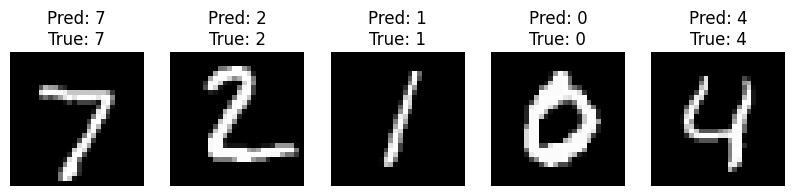

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Parameters
batch_size = 64
time_steps = 30
learning_rate = 1e-3
epochs = 5

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_data = MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Load test data
test_data = MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# LIF Neuron Model with Surrogate Gradient
class LIFNeuron(nn.Module):
    def __init__(self, threshold=1.0, decay=0.9):
        super(LIFNeuron, self).__init__()
        self.threshold = threshold
        self.decay = decay

    def forward(self, x, membrane_potential=None):
        if membrane_potential is None:
            membrane_potential = torch.zeros_like(x, device=x.device)

        membrane_potential = membrane_potential * self.decay + x
        spikes = (membrane_potential >= self.threshold).float()

        # Use surrogate gradient for spikes
        grad_spikes = torch.sigmoid(membrane_potential - self.threshold) * 0.3
        spikes = spikes.detach() + grad_spikes

        # Reset potential where spikes occurred
        membrane_potential = membrane_potential * (1 - spikes)

        return spikes, membrane_potential

# Spiking Neural Network Model
class SNN(nn.Module):
    def __init__(self):
        super(SNN, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 10)
        self.lif1 = LIFNeuron()
        self.lif2 = LIFNeuron()

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = (x + 1) / 2

        spikes = torch.zeros(x.size(0), 10, device=x.device)
        mem_pot1, mem_pot2 = None, None

        for t in range(time_steps):
            x_encoded = torch.bernoulli(x).float()

            h1 = self.fc1(x_encoded)
            h1_spikes, mem_pot1 = self.lif1(h1, mem_pot1)

            h2 = self.fc2(h1_spikes)
            h2_spikes, mem_pot2 = self.lif2(h2, mem_pot2)

            spikes += h2_spikes

        return spikes / time_steps

# Training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# Training loop
for epoch in range(epochs):
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        output = model(images)

        # Compute loss
        loss = criterion(output, labels)
        total_loss += loss.item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss / len(train_loader)}")

# Evaluation function
def evaluate(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # No gradients needed
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            output = model(images)
            _, predicted = torch.max(output.data, 1)  # Get the predicted class
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Evaluate the model
accuracy = evaluate(model, test_loader)
print(f"Test Accuracy: {accuracy:.2f}%")

# Visualize some predictions
def visualize_predictions(model, test_loader, num_images=5):
    model.eval()
    images, labels = next(iter(test_loader))
    images = images.to(device)
    labels = labels.to(device)

    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)

    # Set up the figure
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].cpu().squeeze(), cmap='gray')
        plt.title(f'Pred: {predicted[i].item()}\nTrue: {labels[i].item()}')
        plt.axis('off')
    plt.show()

# Visualize some predictions
visualize_predictions(model, test_loader, num_images=5)
